### 6COM2007 - Programming and Testing the Intelligent Adaptive System
- Marcelo Hernandez
- UH Student ID: 23033126
- April 25, 2024

#### Exploratory Data Analysis

In [50]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Load the data into pandas dataframes 
training_data_path = '../IAS_DATA/6com2007-3.csv'
windows_open_data_path = '../IAS_DATA/windows_open.csv'
new_day_data_path = '../IAS_DATA/New_day.csv'

training_data = pd.read_csv(training_data_path)
windows_open_data = pd.read_csv(windows_open_data_path)
new_day_data = pd.read_csv(new_day_data_path)

In [52]:
# Convert 'Date' values in format 'dd/mm/yy' to 'dd/mm/yyyy' for consistency across datasets
def convert_dates(date_series):
    date_parts = date_series.str.split('/', expand=True)
    date_parts[2] = date_parts[2].apply(lambda x: '20' + x if len(x) == 2 else x)
    return date_parts[0] + '/' + date_parts[1] + '/' + date_parts[2]

# Apply the conversion
training_data['Date'] = convert_dates(training_data['Date'])
windows_open_data['Date'] = convert_dates(windows_open_data['Date'])
new_day_data['Date'] = convert_dates(new_day_data['Date'])

# Parse the 'Datetime' columns
training_data['Datetime'] = pd.to_datetime(training_data['Date'] + ' ' + training_data['Time'], format='%d/%m/%Y %H:%M')
windows_open_data['Datetime'] = pd.to_datetime(windows_open_data['Date'] + ' ' + windows_open_data['Time'], format='%d/%m/%Y %H:%M:%S')  
new_day_data['Datetime'] = pd.to_datetime(new_day_data['Date'] + ' ' + new_day_data['Time'], format='%d/%m/%Y %H:%M')

# Sort the data by 'Datetime' column
training_data_sorted = training_data.sort_values('Datetime')
windows_open_data_sorted = windows_open_data.sort_values('Datetime')
new_day_data_sorted = new_day_data.sort_values('Datetime')

In [53]:
# Perform an initial missing data check
print("\nMissing training_data_cleaned check:")
print(training_data_sorted.isnull().sum())

print("\nMissing windows_open data check:")
print(windows_open_data_sorted.isnull().sum())

print("\nMissing new_day data check:")
print(new_day_data_sorted.isnull().sum())


Missing training_data_cleaned check:
Date                                0
Time                                0
CO2_room                            0
Relative_humidity_room              0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_light_in_north_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Occupancy 1                         0
Occupancy 2                         0
Occupancy 3                         0
Indoor_temperature_room             0
Humidity                            0
Outside temp                        2
Satisfaction                        5
Datetime                            0
dtype: int64

Missing windows_open data check:
Date                                0
Tim

In [54]:
# training_data_sorted: interpolate missing values for 'Satisfaction' (5x) and 'Outside temp' (2x)
training_data_sorted['Satisfaction'] = training_data_sorted['Satisfaction'].fillna(training_data_sorted['Satisfaction'].interpolate(method='linear'))
training_data_sorted['Outside temp'] = training_data_sorted['Outside temp'].fillna(training_data_sorted['Outside temp'].interpolate(method='linear'))

# windows_open_data_sorted is good to go

# new_day_data_sorted: interpolate missing value for 'Outside temp' (1x)
new_day_data_sorted['outside temp'] = new_day_data_sorted['outside temp'].fillna(new_day_data_sorted['outside temp'].interpolate(method='linear'))

In [55]:
# Perform a new missing data check post interpolation
print("\nMissing training_data_cleaned check:")
print(training_data_sorted.isnull().sum())

print("\nMissing windows_open data check:")
print(windows_open_data_sorted.isnull().sum())

print("\nMissing new_day data check:")
print(new_day_data_sorted.isnull().sum())


Missing training_data_cleaned check:
Date                                0
Time                                0
CO2_room                            0
Relative_humidity_room              0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_light_in_north_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Occupancy 1                         0
Occupancy 2                         0
Occupancy 3                         0
Indoor_temperature_room             0
Humidity                            0
Outside temp                        0
Satisfaction                        0
Datetime                            0
dtype: int64

Missing windows_open data check:
Date                                0
Tim

In [56]:
# Save the cleaned windows open and new day data to new csv files
cleaned_training_data_path = '../IAS_DATA/6com2007-3_cleaned.csv'
cleaned_windows_open_data_path = '../IAS_DATA/windows_open_cleaned.csv'
cleaned_new_day_data_path = '../IAS_DATA/New_day_cleaned.csv'

# Save as excel, sortable tables with column names
training_data_sorted.to_csv(cleaned_training_data_path, index=False)
windows_open_data_sorted.to_csv(cleaned_windows_open_data_path, index=False)
new_day_data_sorted.to_csv(cleaned_new_day_data_path, index=False)

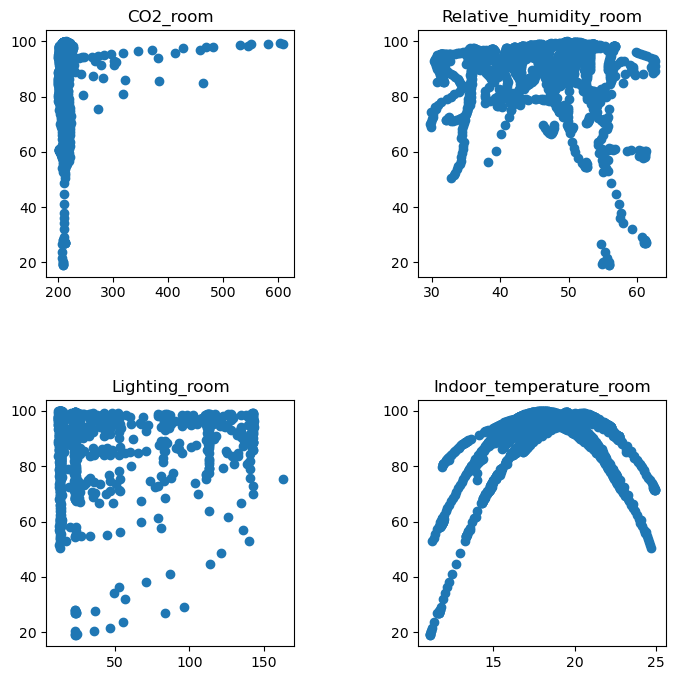

In [66]:
# Plot CO2_room, Relative_humidity_room, Lighting_room, Indoor_temperature_room against 'Satisfaction' if Occupancy 1 = 1 and Occupancy 2 = 0 and Occupancy 3 = 0
if 'Occupancy 1' in training_data_sorted.columns and 'Occupancy 2' in training_data_sorted.columns and 'Occupancy 3' in training_data_sorted.columns:
    training_data_sorted = training_data_sorted[(training_data_sorted['Occupancy 1'] == 1) & (training_data_sorted['Occupancy 2'] == 0) & (training_data_sorted['Occupancy 3'] == 0)]
    fig1, axs1 = plt.subplots(2, 2, figsize=(8, 8))
    fig1.subplots_adjust(hspace=0.5, wspace=0.5)
    axs1[0, 0].scatter(training_data_sorted['CO2_room'], training_data_sorted['Satisfaction'])
    axs1[0, 0].set_title('CO2_room')
    axs1[0, 1].scatter(training_data_sorted['Relative_humidity_room'], training_data_sorted['Satisfaction'])
    axs1[0, 1].set_title('Relative_humidity_room')
    axs1[1, 0].scatter(training_data_sorted['Lighting_room'], training_data_sorted['Satisfaction'])
    axs1[1, 0].set_title('Lighting_room')
    axs1[1, 1].scatter(training_data_sorted['Indoor_temperature_room'], training_data_sorted['Satisfaction'])
    axs1[1, 1].set_title('Indoor_temperature_room')
    plt.show()
    









# fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# #fig.subplots_adjust(hspace=0.5, wspace=0.5)
# axs[0, 0].scatter(training_data_sorted['CO2_room'], training_data_sorted['Satisfaction'])
# axs[0, 0].set_title('CO2_room')
# axs[0, 1].scatter(training_data_sorted['Relative_humidity_room'], training_data_sorted['Satisfaction'])
# axs[0, 1].set_title('Relative_humidity_room')
# axs[1, 0].scatter(training_data_sorted['Lighting_room'], training_data_sorted['Satisfaction'])
# axs[1, 0].set_title('Lighting_room')
# axs[1, 1].scatter(training_data_sorted['Indoor_temperature_room'], training_data_sorted['Satisfaction'])
# axs[1, 1].set_title('Indoor_temperature_room')
